In [43]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [3]:
df = pd.read_excel('final_campus_corrected_remove_field_data.xlsx')

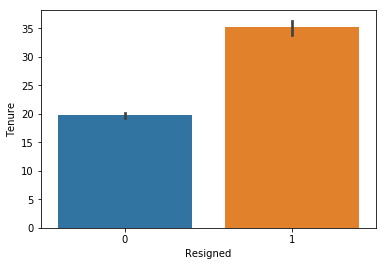

In [49]:
# sns.barplot(df['Tenure'],)
df_resigned = df.loc[df.Resigned==1]
df_noresigned = df.loc[df.Resigned==0]

sns.barplot(df['Resigned'],df['Tenure'])

In [14]:
model = ols('Resigned ~ C(Tenure)', df).fit()
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 11, 3165) =  18.219, p =  0.0000


sum_sq      df          F        PR(>F)
C(Tenure)    7.588367    11.0  18.218549  9.845609e-36
Residual   119.843801  3165.0        NaN           NaN

In [75]:
contingency_table=pd.crosstab(df["MID"],df["Resigned"])
print(contingency_table)
Observed_Values = contingency_table.values

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]

print("Expected Values :-\n",Expected_Values)


no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
critical_value=chi2.ppf(q=1-alpha,df=ddof)
#p-value

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value=',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)

Resigned  0  1
MID           
M1030413  0  1
M1030417  1  0
M1030418  0  1
M1030419  1  0
M1030420  1  0
M1030421  1  0
M1030422  0  1
M1030423  1  0
M1030424  0  1
M1030425  0  1
M1030426  0  1
M1030427  1  0
M1030428  0  1
M1030429  1  0
M1030430  1  0
M1030431  1  0
M1030432  0  1
M1030433  1  0
M1030434  1  0
M1030435  0  1
M1030436  0  1
M1030437  0  1
M1030438  1  0
M1030439  0  1
M1030440  1  0
M1030441  0  1
M1030442  0  1
M1030443  0  1
M1030444  1  0
M1030445  0  1
...      .. ..
M1049290  1  0
M1049291  1  0
M1049292  1  0
M1049293  1  0
M1049294  1  0
M1049295  1  0
M1049296  1  0
M1049297  1  0
M1049298  1  0
M1049299  1  0
M1049300  1  0
M1049301  1  0
M1049302  1  0
M1049303  1  0
M1049304  1  0
M1049305  1  0
M1049306  1  0
M1049307  1  0
M1049308  1  0
M1049309  1  0
M1049310  1  0
M1049311  1  0
M1049312  1  0
M1049313  1  0
M1049314  1  0
M1049315  1  0
M1049316  1  0
M1049317  1  0
M9502074  0  1
M9502076  0  1

[3749 rows x 2 columns]
Expected Values :-
 [[0.814883

In [88]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, df.columns != 'Resigned'], df.iloc[:,-3], test_size = 0.25, random_state = 42)

In [89]:
X_train.drop(columns=['MID','Batch1','Date of joining'],inplace=True)

In [90]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, Y_train);

ValueError: could not convert string to float: 'Ms'

(16, 39)